## Sound Classification

In this notebook, we go through classifying sounds using a CNN: Air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music. 

We preprocess the data by converting .wav files to waveforms, then to melspectrograms which will then be used as input data. The targets are the sounds to be classified, which are label encoded.

Dataset: UrbanSound8k. Can be found in the link below.

https://www.kaggle.com/datasets/chrisfilo/urbansound8k

In [ ]:
import tensorflow as tf
import os
import numpy as np
import librosa
from scipy.io.wavfile import read
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow_io as tfio
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras import datasets, layers, models
import pandas as pd
from scipy.io import wavfile
import scipy.io
import shutil

In [2]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'fold1',
 'fold10',
 'fold2',
 'fold3',
 'fold4',
 'fold5',
 'fold6',
 'fold7',
 'fold8',
 'fold9',
 'Untitled.ipynb',
 'UrbanSound8K.csv',
 'waveform.png']

In [40]:
os.getcwd()

'C:\\Users\\anurag\\Documents\\Python\\Sound Classification'

In [3]:
sounds=[]
for folder, _, filename in os.walk(os.getcwd()):
    for file in filename:
        if file.endswith('wav'):
            sounds.append(os.path.join(folder, file))

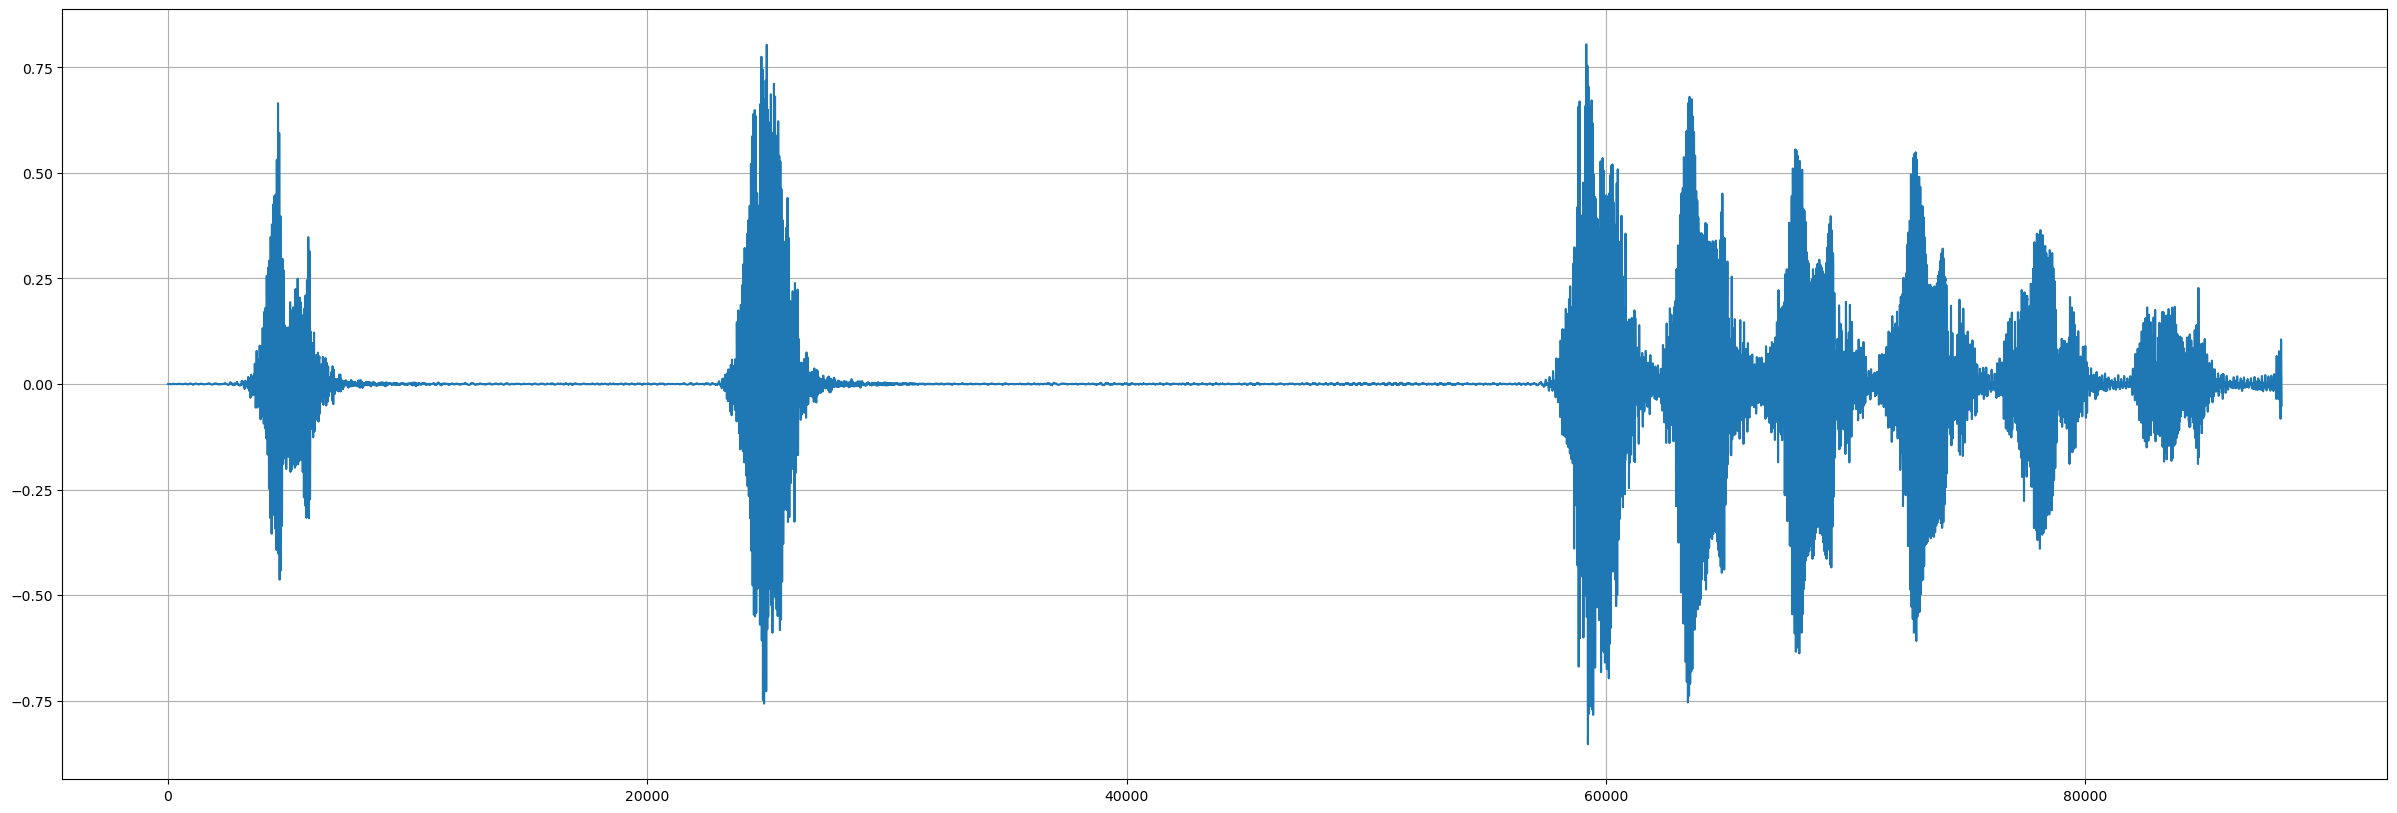

In [4]:
data, sr = librosa.load(sounds[0])


plt.figure(figsize=(30, 10))
plt.plot(data)
plt.grid()
plt.show()

In [39]:
data = librosa.feature.melspectrogram(y=data, sr=sr)


C:\Users\anurag\Anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1
  warnings.warn(


In [76]:
def load_data(file):
    data, sr = librosa.load(file)
    data = librosa.feature.melspectrogram(y=data, sr=sr)
    return data

In [42]:
os.mkdir(os.path.join(os.getcwd(), 'all_vids'))

In [54]:
for folder, _, file in os.walk(os.getcwd()):
    for file in file:
        if file.endswith('wav'):
            start_path = os.path.join(folder, file)
            end_path = os.path.join(os.getcwd(), 'all_vids')
            destination_path = os.path.join(end_path, file)
            shutil.copy(start_path, destination_path)

In [9]:
df = pd.read_csv('UrbanSound8K.csv')
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [67]:
folder_paths = []

for index, row in df.iterrows():
    file_name = row['slice_file_name']
    
    for folder, _, filename in os.walk(os.path.join(os.getcwd(), 'all_vids')):
        
        folder_paths.append(os.path.join(folder, file_name))

In [69]:
for i in folder_paths:
    print(i)

C:\Users\anurag\Documents\Python\Sound Classification\all_vids\100032-3-0-0.wav
C:\Users\anurag\Documents\Python\Sound Classification\all_vids\100263-2-0-117.wav
C:\Users\anurag\Documents\Python\Sound Classification\all_vids\100263-2-0-121.wav
C:\Users\anurag\Documents\Python\Sound Classification\all_vids\100263-2-0-126.wav
C:\Users\anurag\Documents\Python\Sound Classification\all_vids\100263-2-0-137.wav
C:\Users\anurag\Documents\Python\Sound Classification\all_vids\100263-2-0-143.wav
C:\Users\anurag\Documents\Python\Sound Classification\all_vids\100263-2-0-161.wav
C:\Users\anurag\Documents\Python\Sound Classification\all_vids\100263-2-0-3.wav
C:\Users\anurag\Documents\Python\Sound Classification\all_vids\100263-2-0-36.wav
C:\Users\anurag\Documents\Python\Sound Classification\all_vids\100648-1-0-0.wav
C:\Users\anurag\Documents\Python\Sound Classification\all_vids\100648-1-1-0.wav
C:\Users\anurag\Documents\Python\Sound Classification\all_vids\100648-1-2-0.wav
C:\Users\anurag\Documents\P

In [72]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['class'] = le.fit_transform(df['class'])

df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,3
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,2
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,2
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,2
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,2
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,1
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,1
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,1
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,1


In [78]:
feature_data = []

for idx, i in enumerate(folder_paths):
    data = load_data(folder_paths[idx])
    feature_data.append(data)

C:\Users\anurag\Anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
C:\Users\anurag\Anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\anurag\Anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [87]:
features = []
indexes = []
for idx, i in enumerate(feature_data):
    if np.shape(i) == (128, 173):
        features.append(i)
    else:
        indexes.append(idx)

In [90]:
df = df.drop(indexes, axis=0)

KeyError: '[0, 9, 10, 11, 12, 13, 100, 101, 102, 103, 105, 106, 181, 193, 194, 195, 201, 214, 215, 496, 497, 498, 499, 545, 551, 559, 560, 561, 562, 599, 602, 606, 611, 626, 680, 730, 734, 736, 737, 738, 760, 761, 799, 800, 814, 815, 816, 817, 818, 819, 862, 863, 868, 875, 876, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 934, 935, 936, 937, 938, 942, 943, 992, 995, 1000, 1079, 1080, 1081, 1082, 1083, 1087, 1088, 1145, 1146, 1147, 1169, 1170, 1171, 1172, 1173, 1243, 1244, 1261, 1268, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1380, 1381, 1382, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1465, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1581, 1582, 1598, 1599, 1600, 1601, 1608, 1626, 1627, 1628, 1637, 1638, 1639, 1640, 1641, 1642, 1647, 1712, 1735, 1736, 1771, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1839, 1840, 1947, 1948, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1975, 1977, 1978, 2006, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2095, 2096, 2109, 2110, 2111, 2120, 2121, 2122, 2123, 2124, 2146, 2148, 2149, 2164, 2208, 2209, 2210, 2211, 2212, 2245, 2296, 2297, 2298, 2303, 2304, 2305, 2307, 2313, 2341, 2342, 2343, 2355, 2370, 2394, 2395, 2396, 2397, 2398, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2448, 2449, 2450, 2542, 2558, 2559, 2560, 2572, 2573, 2574, 2575, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2671, 2712, 2766, 2778, 2779, 2780, 2781, 2827, 2828, 2829, 2834, 2835, 2836, 2837, 2846, 2847, 2848, 2849, 2867, 2877, 2903, 2943, 2944, 2945, 2961, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3034, 3035, 3036, 3037, 3038, 3052, 3053, 3054, 3055, 3056, 3073, 3080, 3083, 3096, 3144, 3145, 3146, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3183, 3189, 3190, 3191, 3192, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3276, 3282, 3286, 3287, 3289, 3290, 3291, 3295, 3296, 3297, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3398, 3420, 3430, 3431, 3440, 3453, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3477, 3478, 3479, 3480, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3490, 3494, 3507, 3509, 3555, 3585, 3586, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3638, 3639, 3640, 3641, 3642, 3699, 3700, 3701, 3702, 3703, 3704, 3705, 3706, 3707, 3708, 3709, 3710, 3711, 3712, 3713, 3714, 3715, 3737, 3747, 3748, 3749, 3750, 3983, 3984, 3985, 3986, 3987, 3988, 4019, 4020, 4021, 4022, 4032, 4135, 4136, 4142, 4151, 4152, 4153, 4154, 4155, 4156, 4157, 4158, 4159, 4160, 4161, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4171, 4172, 4173, 4174, 4175, 4176, 4177, 4178, 4207, 4211, 4257, 4258, 4259, 4278, 4279, 4280, 4281, 4282, 4283, 4284, 4285, 4286, 4287, 4288, 4289, 4290, 4394, 4404, 4406, 4407, 4408, 4409, 4410, 4411, 4412, 4413, 4414, 4424, 4434, 4441, 4442, 4443, 4444, 4445, 4454, 4463, 4529, 4530, 4531, 4532, 4533, 4534, 4535, 4536, 4548, 4572, 4573, 4574, 4575, 4576, 4577, 4578, 4602, 4603, 4621, 4622, 4624, 4626, 4627, 4640, 4644, 4656, 4657, 4664, 4665, 4666, 4667, 4668, 4669, 4670, 4671, 4672, 4673, 4687, 4688, 4690, 4691, 4692, 4693, 4694, 4695, 4696, 4697, 4698, 4699, 4700, 4701, 4702, 4718, 4725, 4726, 4727, 4728, 4804, 4805, 4837, 4882, 4941, 4942, 4943, 4944, 4965, 4966, 4967, 5016, 5019, 5020, 5021, 5025, 5026, 5032, 5039, 5040, 5041, 5042, 5043, 5044, 5047, 5048, 5049, 5050, 5051, 5061, 5063, 5074, 5079, 5080, 5094, 5095, 5096, 5097, 5098, 5099, 5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107, 5108, 5109, 5110, 5111, 5112, 5113, 5114, 5115, 5116, 5117, 5118, 5119, 5120, 5121, 5153, 5154, 5155, 5163, 5164, 5165, 5166, 5167, 5168, 5169, 5177, 5178, 5179, 5236, 5259, 5260, 5261, 5262, 5263, 5264, 5265, 5280, 5378, 5438, 5443, 5445, 5446, 5447, 5454, 5456, 5457, 5458, 5459, 5460, 5461, 5462, 5463, 5464, 5465, 5466, 5467, 5468, 5482, 5483, 5517, 5518, 5519, 5520, 5521, 5522, 5523, 5524, 5525, 5526, 5527, 5528, 5530, 5531, 5532, 5533, 5534, 5535, 5536, 5568, 5583, 5644, 5645, 5646, 5647, 5652, 5653, 5654, 5655, 5657, 5658, 5660, 5661, 5662, 5668, 5671, 5675, 5678, 5679, 5680, 5684, 5685, 5686, 5687, 5688, 5690, 5691, 5692, 5693, 5695, 5696, 5697, 5698, 5699, 5700, 5701, 5702, 5713, 5714, 5715, 5716, 5717, 5718, 5719, 5751, 5752, 5866, 5867, 5868, 5869, 5870, 5871, 5873, 5874, 5875, 5876, 5877, 5878, 5879, 5880, 5881, 5882, 5883, 5884, 5885, 5886, 5887, 5888, 5889, 5890, 5891, 5892, 5893, 5894, 5899, 5900, 5901, 5902, 5904, 5905, 5916, 5917, 5918, 5939, 5947, 5948, 5949, 5964, 5987, 5988, 5989, 5990, 5991, 5992, 6060, 6061, 6063, 6079, 6080, 6098, 6099, 6101, 6102, 6103, 6104, 6105, 6106, 6107, 6108, 6109, 6111, 6113, 6114, 6115, 6116, 6117, 6118, 6119, 6120, 6124, 6125, 6126, 6127, 6128, 6129, 6130, 6131, 6132, 6133, 6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 6158, 6159, 6160, 6161, 6162, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170, 6171, 6177, 6178, 6179, 6180, 6181, 6182, 6193, 6195, 6200, 6209, 6210, 6211, 6227, 6230, 6231, 6245, 6246, 6247, 6248, 6249, 6250, 6251, 6252, 6253, 6254, 6255, 6256, 6263, 6264, 6265, 6266, 6267, 6268, 6270, 6271, 6274, 6275, 6276, 6277, 6278, 6279, 6280, 6294, 6339, 6340, 6341, 6401, 6402, 6403, 6404, 6408, 6425, 6426, 6432, 6453, 6454, 6455, 6456, 6457, 6458, 6459, 6460, 6461, 6462, 6463, 6464, 6466, 6467, 6468, 6469, 6471, 6472, 6473, 6474, 6475, 6476, 6492, 6493, 6494, 6504, 6505, 6506, 6507, 6508, 6509, 6510, 6511, 6512, 6554, 6555, 6556, 6557, 6558, 6559, 6560, 6561, 6562, 6563, 6564, 6565, 6566, 6567, 6589, 6593, 6594, 6595, 6596, 6614, 6615, 6616, 6617, 6629, 6644, 6645, 6646, 6647, 6651, 6652, 6657, 6661, 6662, 6664, 6681, 6682, 6683, 6686, 6687, 6725, 6726, 6727, 6761, 6766, 6890, 6891, 6892, 6893, 6903, 6905, 6930, 6960, 6961, 6984, 6986, 7020, 7021, 7022, 7090, 7220, 7230, 7257, 7258, 7259, 7260, 7312, 7313, 7314, 7315, 7329, 7330, 7334, 7335, 7339, 7340, 7347, 7365, 7366, 7367, 7368, 7373, 7374, 7375, 7376, 7377, 7378, 7379, 7380, 7381, 7382, 7383, 7384, 7385, 7386, 7387, 7388, 7389, 7390, 7391, 7392, 7393, 7394, 7395, 7396, 7397, 7398, 7399, 7400, 7401, 7403, 7404, 7421, 7422, 7449, 7450, 7455, 7456, 7457, 7458, 7485, 7499, 7515, 7516, 7547, 7570, 7571, 7572, 7587, 7594, 7603, 7608, 7616, 7617, 7618, 7625, 7652, 7655, 7657, 7658, 7659, 7671, 7934, 7935, 7936, 7937, 7938, 7939, 7940, 7941, 7942, 7943, 7944, 7945, 7946, 7984, 7985, 7986, 7992, 7995, 7996, 7997, 7998, 8007, 8008, 8011, 8012, 8013, 8100, 8128, 8129, 8130, 8131, 8142, 8143, 8144, 8145, 8167, 8195, 8215, 8236, 8237, 8238, 8271, 8272, 8280, 8281, 8282, 8283, 8284, 8285, 8286, 8295, 8297, 8299, 8301, 8316, 8317, 8318, 8319, 8320, 8321, 8322, 8324, 8325, 8326, 8327, 8328, 8329, 8330, 8331, 8336, 8337, 8338, 8349, 8350, 8351, 8352, 8353, 8354, 8367, 8368, 8397, 8398, 8399, 8400, 8401, 8402, 8403, 8404, 8435, 8462, 8471, 8535, 8536, 8537, 8538, 8539, 8553, 8554, 8558, 8559, 8560, 8611, 8612, 8613, 8614, 8615, 8616, 8617, 8618, 8625, 8627, 8628, 8629, 8630, 8631, 8632, 8633, 8634, 8635, 8643, 8655, 8656, 8681, 8728, 8729, 8730, 8731] not found in axis'

In [91]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,2
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,2
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,2
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,2
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,2
...,...,...,...,...,...,...,...,...
8723,99812-1-0-0.wav,99812,38.176254,42.176254,2,7,1,1
8724,99812-1-0-1.wav,99812,38.676254,42.676254,2,7,1,1
8725,99812-1-0-2.wav,99812,39.176254,43.176254,2,7,1,1
8726,99812-1-1-0.wav,99812,89.207778,93.207778,2,7,1,1


In [99]:
labels = df['class'].to_numpy()

In [101]:
len(labels)

7327

In [118]:
len(features)

7327

In [119]:
features = np.array(features)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [121]:
type(features)

numpy.ndarray

In [116]:
y_train[0]

8

In [122]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 173, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
154/154 [==============================] - 149s 943ms/step - loss: 2.4387 - accuracy: 0.3455 - val_loss: 1.7200 - val_accuracy: 0.4458
Epoch 2/10
154/154 [==============================] - 146s 946ms/step - loss: 1.3543 - accuracy: 0.5390 - val_loss: 1.5599 - val_accuracy: 0.5500
Epoch 3/10
154/154 [==============================] - 144s 933ms/step - loss: 1.0616 - accuracy: 0.6409 - val_loss: 1.7211 - val_accuracy: 0.5521
Epoch 4/10
154/154 [==============================] - 138s 894ms/step - loss: 0.8460 - accuracy: 0.7164 - val_loss: 1.6474 - val_accuracy: 0.5988
Epoch 5/10
154/154 [==============================] - 139s 901ms/step - loss: 0.7037 - accuracy: 0.7663 - val_loss: 1.7963 - val_accuracy: 0.6348
Epoch 6/10
154/154 [==============================] - 138s 899ms/step - loss: 0.8127 - accuracy: 0.7553 - val_loss: 2.0491 - val_accuracy: 0.6170
Epoch 7/10
154/154 [==============================] - 161s 1s/step - loss: 0.7312 - accuracy: 0.7881 - val_loss: 3.0512 - va

In [124]:
yhat = model.predict(X_test)

76/76 [==============================] - 15s 196ms/step


In [137]:
np.argmax(yhat[0])

5

In [146]:
[np.argmax(yhat[i]) for i in range(20)]

[5, 4, 7, 8, 7, 0, 0, 5, 5, 2, 8, 3, 9, 2, 5, 9, 0, 4, 4, 5]

In [148]:
y_test[0:20]

array([5, 4, 7, 9, 7, 0, 0, 5, 5, 2, 8, 3, 2, 2, 5, 2, 0, 4, 4, 5],
      dtype=int64)